<a href="https://colab.research.google.com/github/amitdeo28/Pytorch-/blob/main/simple_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
  # Input layer(4 features of flower) -->
  # Hidden layer1 (number of neurons) --> H2 (n) --> Output layer (# classes of iris flowers)

  def __init__(self, in_features = 4, h1 = 8, h2 = 9, out_features = 3):
    super().__init__() #instiatiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))   #relu --> rectified linear unit function
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [3]:
# Pick a random seed for randomization
torch.manual_seed(41)
# create an instance for Model
model = Model()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)

In [6]:
my_df.head(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [7]:
my_df.shape

(150, 5)

In [8]:
# Change last column from string to integers
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [9]:
# Train Test Split --> Set X, y
X = my_df.drop('variety', axis = 1)
y = my_df['variety']

In [10]:
# Convert these to numpy array
X = X.values
y = y.values

In [11]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [14]:
# convert X feature to float Tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [15]:
# Convert y label to Tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [16]:
# Set the criterion of mpdel to measure the error, how far off the presictions are from the data
criterion = nn.CrossEntropyLoss()
# choose Adam Optimizer, lr = learning rate
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [17]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [18]:
# Train our Model
# Epochs? --> (one run thru all the data in our network)
epochs = 100
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train)    #get predicted results

  # Measure rhe loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) #predicted value vs y_train

  # Keep track of our losses
  losses.append(loss.detach().numpy())

  # Print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch {i} and loss {loss}')

  # Do some back propagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch 0 and loss 1.125203251838684
Epoch 10 and loss 1.0097211599349976
Epoch 20 and loss 0.8162347674369812
Epoch 30 and loss 0.585993230342865
Epoch 40 and loss 0.4003389775753021
Epoch 50 and loss 0.26794716715812683
Epoch 60 and loss 0.1796349585056305
Epoch 70 and loss 0.12165623158216476
Epoch 80 and loss 0.0860651507973671
Epoch 90 and loss 0.06522614508867264


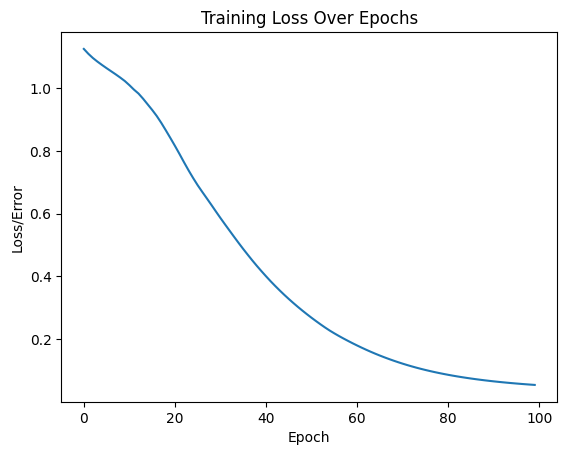

In [19]:
# Graph it out
plt.plot(range(epochs), losses)
plt.ylabel('Loss/Error')
plt.xlabel('Epoch')
plt.title('Training Loss Over Epochs')
plt.show()

In [20]:
# Evaluate the Model on test Data Set (validate model on test set)
with torch.no_grad():  #Basically it turn off thr back propagation
  y_val = model.forward(X_test)
  loss = criterion(y_val, y_test)

In [21]:
loss

tensor(0.1315)

In [22]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    # Will tell us what type of flower class our network thinks it is
    print(f'{i+1}.) {str(y_val)} \t {y_test[i]}')

1.) tensor([-5.8771,  4.4629,  6.5155]) 	 2
2.) tensor([-7.5451,  4.1668,  9.7293]) 	 2
3.) tensor([-8.4517,  5.1275, 10.2015]) 	 2
4.) tensor([-4.3411,  5.6280,  2.5636]) 	 1
5.) tensor([-7.1838,  4.8757,  8.3023]) 	 2
6.) tensor([-3.3940,  5.3421,  1.2802]) 	 1
7.) tensor([-5.9240,  4.9826,  6.0025]) 	 2
8.) tensor([-4.2895,  5.7016,  2.3920]) 	 1
9.) tensor([-6.5369,  4.9261,  7.1291]) 	 2
10.) tensor([-8.0526,  4.4129, 10.3325]) 	 2
11.) tensor([-5.6775,  4.9505,  5.6248]) 	 2
12.) tensor([ 4.5748, -2.2579, -2.8925]) 	 0
13.) tensor([ 4.2646, -2.0055, -2.7342]) 	 0
14.) tensor([-2.1081,  4.0482,  0.5803]) 	 1
15.) tensor([ 3.4608, -1.2147, -2.3488]) 	 0
16.) tensor([-5.4739,  5.1174,  5.0966]) 	 2
17.) tensor([ 4.0637, -1.8045, -2.6504]) 	 0
18.) tensor([-5.8090,  4.6057,  6.2494]) 	 1
19.) tensor([ 4.9250, -2.5763, -3.0545]) 	 0
20.) tensor([ 3.4559, -1.2559, -2.3637]) 	 0
21.) tensor([-2.6161,  4.5584,  0.8575]) 	 1
22.) tensor([-7.7427,  4.7379,  9.4233]) 	 2
23.) tensor([ 3.577